<a href="https://colab.research.google.com/github/odam2323/weldingQualityMachineLearning/blob/main/dataPreparation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src = "https://drive.google.com/uc?export=view&id=1lrzkRlmABf8ZwwCzsSvo0b2lW_IhZXkv" alt = "Encabezado MLDS" width = "100%">  </img>


# **Preparación de los datos**
---

Este notebook es una plantilla que le puede servir como guía para el tercer entregable del proyecto aplicado.

## **0. Integrantes del equipo de trabajo**
---


1. Sarah Fonseca C.C.: 1032487465
2. Christian Camilo Barriga C.C.: 1023860937
3. Andrés Serrano C.C.: 1026574836

### **0.1 Carga de datos**
---

Antes de comenzar con la carga de datos, es importante mencionar que el presente proyecto usará imagenes de una biblioteca personal, por lo que extraeremos las imagenes de nuestras carpetas de google drive, como se muestra a continuación.

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt
import os
import pandas as pd
import numpy as np
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


Como tal, es importante tener en cuenta que dividimos las imagenes en dos, según sean consideradas buenas muestras de soldadura, o malas muestras.

In [ ]:
BASE_PATH = '/content/drive/MyDrive/clasificador_soldadura/data'
RAW_GOOD_PATH = os.path.join(BASE_PATH, '/content/drive/MyDrive/clasificador_soldadura/data/processed_data/good')
RAW_BAD_PATH = os.path.join(BASE_PATH, '/content/drive/MyDrive/clasificador_soldadura/data/processed_data/bad')

posteriormente verificamos que existna las carpetas en cuestión.

In [ ]:
def verify_path(path: str):
  if not os.path.exists(path):
    print(f"Error: La carpeta no existe en {path}")
    return False
  else:
    return True

In [ ]:
verify_path(RAW_GOOD_PATH)

True

In [ ]:
verify_path(RAW_BAD_PATH)

True

A continuación se presenta una serie de funciones auxiliares para el trabajo con las imagenes.

In [ ]:
# Funciones auxiliares
def is_valid_img(filename: str):
    """Verifica si el archivo es una imagen válida"""
    return filename.lower().endswith(('.jpg', '.jpeg', '.png', '.bmp', '.tiff'))

def get_img_size(path: str):
    """Obtiene las dimensiones de la imagen"""
    with Image.open(path) as img:
        return img.size

def img_to_record(directory: str, filename: str, label: int):
    """Crea un registro con la información de la imagen"""
    width, height = get_img_size(os.path.join(directory, filename))
    return [filename, width, height, label]

def img_to_grayscale_array(filepath: str, resize_to=None):
    """Convierte la imagen a escala de grises y opcionalmente la redimensiona"""
    with Image.open(filepath) as img:
        img_gray = img.convert('L')
        if resize_to:
            img_gray = img_gray.resize(resize_to, Image.Resampling.LANCZOS)
        return np.array(img_gray)

def procesar_y_mostrar_imagen(ruta_imagen, clasificacion, mostrar_img=False):
    """Procesa la imagen y la muestra (opcional)"""
    try:
        # Abrir y convertir a blanco y negro
        imagen_color = Image.open(ruta_imagen)
        imagen_bn = imagen_color.convert('L')

        # Obtener el nombre del archivo sin extensión para el guardado
        nombre_base = os.path.splitext(os.path.basename(ruta_imagen))[0]
        nombre_guardado = f"{nombre_base}_bn.jpeg"

        # Guardar la imagen en blanco y negro
        imagen_bn.save(nombre_guardado)

        # Mostrar la imagen
        if mostrar_img:
          plt.figure(figsize=(6, 4))
          plt.imshow(imagen_bn, cmap='gray')
          plt.title(f"{clasificacion.upper()} - {os.path.basename(ruta_imagen)}")
          plt.axis('off')
          plt.show()

        print(f"Procesada: {os.path.basename(ruta_imagen)} : {clasificacion.upper()}")
        return True

    except Exception as e:
        print(f"✗ Error procesando {ruta_imagen}: {e}")
        return False

### **0.2. Resumen General**
---
Con la intención de poder realizar el informe siguiente, acá estará resumido el codigo desde el cual podemos convertir imagenes en datos para su posterior analisis.

In [ ]:
# Procesar imágenes GOOD (label = 1)

print("Imagenes GOOD")


valid_good_imgs = list(filter(is_valid_img, os.listdir(RAW_GOOD_PATH)))
good_records = []

for filename in valid_good_imgs:
    if procesar_y_mostrar_imagen(os.path.join(RAW_GOOD_PATH, filename), "GOOD", False):
        record = img_to_record(RAW_GOOD_PATH, filename, 1)  # Label 1 para GOOD
        good_records.append(record)

Imagenes GOOD
Procesada: 1A0.png : GOOD
Procesada: 1A1.png : GOOD
Procesada: 1A2.png : GOOD
Procesada: 1A3.png : GOOD
Procesada: 1A4.png : GOOD
Procesada: 1A5.png : GOOD
Procesada: 1A6.png : GOOD
Procesada: 1A7.png : GOOD
Procesada: 1A8.png : GOOD
Procesada: 1A9.png : GOOD
Procesada: 1A10.png : GOOD
Procesada: 1A11.png : GOOD
Procesada: 1B0.png : GOOD
Procesada: 1B1.png : GOOD
Procesada: 1B2.png : GOOD
Procesada: 1B3.png : GOOD
Procesada: 1B4.png : GOOD
Procesada: 1B5.png : GOOD
Procesada: 1B6.png : GOOD
Procesada: 1B7.png : GOOD
Procesada: 1B8.png : GOOD
Procesada: 1B9.png : GOOD
Procesada: 2A0.png : GOOD
Procesada: 2A1.png : GOOD
Procesada: 2A2.png : GOOD
Procesada: 2A3.png : GOOD
Procesada: 2A4.png : GOOD
Procesada: 2A5.png : GOOD
Procesada: 2A6.png : GOOD
Procesada: 2A7.png : GOOD
Procesada: 2A8.png : GOOD
Procesada: 2B0.png : GOOD
Procesada: 2B1.png : GOOD
Procesada: 2B2.png : GOOD
Procesada: 2B3.png : GOOD
Procesada: 2B4.png : GOOD
Procesada: 2B5.png : GOOD
Procesada: 2B6.png : G

In [ ]:
# Procesar imágenes BAD (label = 0)

print("Imagenes BAD ")


valid_bad_imgs = list(filter(is_valid_img, os.listdir(RAW_BAD_PATH)))
bad_records = []

for filename in valid_bad_imgs:
    if procesar_y_mostrar_imagen(os.path.join(RAW_BAD_PATH, filename), "BAD", False):
        record = img_to_record(RAW_BAD_PATH, filename, 0)  # Label 0 para BAD
        bad_records.append(record)

Imagenes BAD 
Procesada: 12A1.png : BAD
Procesada: 13A4.png : BAD
Procesada: 13A7.png : BAD
Procesada: 12B1.png : BAD
Procesada: 12B4.png : BAD
Procesada: 13A1.png : BAD
Procesada: 12A9.png : BAD
Procesada: 12A8.png : BAD
Procesada: 13B3.png : BAD
Procesada: 13A2.png : BAD
Procesada: 13A5.png : BAD
Procesada: 12B8.png : BAD
Procesada: 13B1.png : BAD
Procesada: 12B3.png : BAD
Procesada: 13A0.png : BAD
Procesada: 12B2.png : BAD
Procesada: 12A0.png : BAD
Procesada: 13B0.png : BAD
Procesada: 12B9.png : BAD
Procesada: 13B8.png : BAD
Procesada: 13B9.png : BAD
Procesada: 13B7.png : BAD
Procesada: 12B5.png : BAD
Procesada: 12B7.png : BAD
Procesada: 13B5.png : BAD
Procesada: 12B6.png : BAD
Procesada: 12A7.png : BAD
Procesada: 13A6.png : BAD
Procesada: 12A4.png : BAD
Procesada: 13A3.png : BAD
Procesada: 13B6.png : BAD
Procesada: 13A8.png : BAD
Procesada: 12A3.png : BAD
Procesada: 13A9.png : BAD
Procesada: 12A6.png : BAD
Procesada: 13B2.png : BAD
Procesada: 12A5.png : BAD
Procesada: 11B1.png : BA

A continuación ordenaremos la información de las imagenes en datasets para así poder realizar una exposición como tal de estos archivos.

In [ ]:
df_good = pd.DataFrame(good_records, columns=["filename", "width", "height", "label"])
df_bad = pd.DataFrame(bad_records, columns=["filename", "width", "height", "label"])

df_completo = pd.concat([df_good, df_bad], ignore_index=True)

df_completo['clasificacion'] = df_completo['label'].map({1: 'GOOD', 0: 'BAD'})

print("dataset completo")

print(f"Total de imágenes procesadas: {len(df_completo)}")
print(f"Imágenes GOOD (1): {len(df_good)}")
print(f"Imágenes BAD (0): {len(df_bad)}")

print("\nDataset Good:")
display(df_good.head())

print("\nDataset Bad:")
display(df_bad.head())

print("\nDataset Combinado:")
display(df_completo.head())

# Estadísticas del dataset
print("estadísticas del dataset")

print(f"Dimensiones del dataset: {df_completo.shape}")
print(f"\nDistribución de labels:")
print(df_completo['label'].value_counts())
print(f"\nDistribución de clasificaciones:")
print(df_completo['clasificacion'].value_counts())

print(f"\nEstadísticas de dimensiones de imágenes:")
print(f"Ancho promedio: {df_completo['width'].mean():.1f} px")
print(f"Alto promedio: {df_completo['height'].mean():.1f} px")
print(f"Ancho mínimo: {df_completo['width'].min()} px")
print(f"Ancho máximo: {df_completo['width'].max()} px")
print(f"Alto mínimo: {df_completo['height'].min()} px")
print(f"Alto máximo: {df_completo['height'].max()} px")

# Guardar el dataset completo
df_completo.to_csv('dataset_imagenes_clasificadas.csv', index=False)
print(f"\n✓ Dataset guardado en 'dataset_imagenes_clasificadas.csv'")

dataset completo
Total de imágenes procesadas: 180
Imágenes GOOD (1): 60
Imágenes BAD (0): 120

Dataset Good:


,filename,width,height,label
0,1A0.png,1795,330,1
1,1A1.png,1796,276,1
2,1A2.png,1765,335,1
3,1A3.png,1824,272,1
4,1A4.png,1829,282,1



Dataset Bad:


,filename,width,height,label
0,12A1.png,1827,203,0
1,13A4.png,1748,357,0
2,13A7.png,1742,323,0
3,12B1.png,1884,191,0
4,12B4.png,1830,253,0



Dataset Combinado:


,filename,width,height,label,clasificacion
0,1A0.png,1795,330,1,GOOD
1,1A1.png,1796,276,1,GOOD
2,1A2.png,1765,335,1,GOOD
3,1A3.png,1824,272,1,GOOD
4,1A4.png,1829,282,1,GOOD


estadísticas del dataset
Dimensiones del dataset: (180, 5)

Distribución de labels:
label
0    120
1     60
Name: count, dtype: int64

Distribución de clasificaciones:
clasificacion
BAD     120
GOOD     60
Name: count, dtype: int64

Estadísticas de dimensiones de imágenes:
Ancho promedio: 1852.8 px
Alto promedio: 303.1 px
Ancho mínimo: 1705 px
Ancho máximo: 2125 px
Alto mínimo: 162 px
Alto máximo: 548 px

✓ Dataset guardado en 'dataset_imagenes_clasificadas.csv'


De esta manera, el anterior codigo nuos muestras la cantidad de imagenes que se poseen, mostrandonos el tamaño del conjunto de datos y las divisiones de estas imagenes entre buenas y malas muestras. Ahora bien, también podemos reconocer que las imagenes estan en formatos diferentes; jpeg, png y jpg, por lo que debemos trabajar con estas diferencias.

Ahora bien, en una segunda parte, podemos analizar estas imagenes en tanto datos, para ello aplicaremos un histogram oriented gradient (HOG), tal y como mostraremos a continuación, comenzando por unas funciones que serán aplicadas para esto.



Acontinuación revisaremos el formato de las imagenes, lo que permitirá realizar una estandarización previa a trabajar con los datos.

In [ ]:
from collections import Counter

def summarize_image_formats(folder):
    formats = []
    for f in os.listdir(folder):
        if f.lower().endswith(('.jpg', '.jpeg', '.png', '.bmp', '.tiff', '.webp')):
            try:
                with Image.open(os.path.join(folder, f)) as img:
                    formats.append(img.format)
            except:
                pass
    return Counter(formats)

print("Formatos en good:", summarize_image_formats(RAW_GOOD_PATH))
print("Formatos en bad:", summarize_image_formats(RAW_BAD_PATH))

Formatos en good: Counter({'PNG': 60})
Formatos en bad: Counter({'PNG': 120})


Lo anterior nos permite darnos cuenta que si bien hay archivos cuyo nombre termina en `.jpg` en el caso especifico del directorio de buenas soldaduras, en realidad su formato es `.mpo`, adicionalmente en el directorio de malas soldaduras vemos que hay imagenes en `.png` y `.jpeg`, por lo que es imporante estandarizar en un solo formato de imágenes. Estandarizaremos a `.png` siendo el formato más adecuado para los analisis que realizaremos posteriormente. Este formato conserva de forma adecuada bordes y gradientes de las imagenes, lo que nos interesa para el Histogram of Oriented Gradients (HOG), que abordaremos posteriormente.

In [ ]:
def convert_images(input_dir, output_dir, format='PNG', overwrite=True):
    """
    Convierte todas las imágenes de un directorio a un formato específico.
    """
    os.makedirs(output_dir, exist_ok=True)
    converted = []

    for filename in os.listdir(input_dir):
        filepath = os.path.join(input_dir, filename)
        if not os.path.isfile(filepath):
            continue
        try:
            with Image.open(filepath) as img:
                img = img.convert("RGB")
                base_name, _ = os.path.splitext(filename)
                output_path = os.path.join(output_dir, f"{base_name}.{format.lower()}")
                if not overwrite and os.path.exists(output_path):
                    continue
                img.save(output_path, format=format, quality=95 if format=='JPEG' else None)
                converted.append(output_path)
        except Exception as e:
            print(f"Error con {filename}: {e}")
    print(f"{len(converted)} imágenes convertidas a {format}")
    return converted

In [ ]:
PROCESSED_IMG_PATH = os.path.join(BASE_PATH, 'processed_data')

convert_images(RAW_GOOD_PATH, os.path.join(PROCESSED_IMG_PATH, 'good'), format="PNG")

60 imágenes convertidas a PNG


['/content/drive/MyDrive/clasificador_soldadura/data/processed_data/good/1A0.png',
 '/content/drive/MyDrive/clasificador_soldadura/data/processed_data/good/1A1.png',
 '/content/drive/MyDrive/clasificador_soldadura/data/processed_data/good/1A2.png',
 '/content/drive/MyDrive/clasificador_soldadura/data/processed_data/good/1A3.png',
 '/content/drive/MyDrive/clasificador_soldadura/data/processed_data/good/1A4.png',
 '/content/drive/MyDrive/clasificador_soldadura/data/processed_data/good/1A5.png',
 '/content/drive/MyDrive/clasificador_soldadura/data/processed_data/good/1A6.png',
 '/content/drive/MyDrive/clasificador_soldadura/data/processed_data/good/1A7.png',
 '/content/drive/MyDrive/clasificador_soldadura/data/processed_data/good/1A8.png',
 '/content/drive/MyDrive/clasificador_soldadura/data/processed_data/good/1A9.png',
 '/content/drive/MyDrive/clasificador_soldadura/data/processed_data/good/1A10.png',
 '/content/drive/MyDrive/clasificador_soldadura/data/processed_data/good/1A11.png',
 '

In [ ]:
convert_images(RAW_BAD_PATH, os.path.join(PROCESSED_IMG_PATH, 'bad'), format="PNG")

120 imágenes convertidas a PNG


['/content/drive/MyDrive/clasificador_soldadura/data/processed_data/bad/12A1.png',
 '/content/drive/MyDrive/clasificador_soldadura/data/processed_data/bad/13A4.png',
 '/content/drive/MyDrive/clasificador_soldadura/data/processed_data/bad/13A7.png',
 '/content/drive/MyDrive/clasificador_soldadura/data/processed_data/bad/12B1.png',
 '/content/drive/MyDrive/clasificador_soldadura/data/processed_data/bad/12B4.png',
 '/content/drive/MyDrive/clasificador_soldadura/data/processed_data/bad/13A1.png',
 '/content/drive/MyDrive/clasificador_soldadura/data/processed_data/bad/12A9.png',
 '/content/drive/MyDrive/clasificador_soldadura/data/processed_data/bad/12A8.png',
 '/content/drive/MyDrive/clasificador_soldadura/data/processed_data/bad/13B3.png',
 '/content/drive/MyDrive/clasificador_soldadura/data/processed_data/bad/13A2.png',
 '/content/drive/MyDrive/clasificador_soldadura/data/processed_data/bad/13A5.png',
 '/content/drive/MyDrive/clasificador_soldadura/data/processed_data/bad/12B8.png',
 '/c

In [ ]:
from skimage.feature import hog

def img_processing_hog_features(path: str, resize_to = (200, 200)):
  """Extrae las características HOG de una imagen dada."""
  img_array = img_to_grayscale_array(path, resize_to)
  hog_features = hog(
      img_array,
      orientations=9,
      pixels_per_cell=(8,8),
      cells_per_block=(2,2),
      visualize=False,
      block_norm='L2-Hys'
  )
  return hog_features

In [ ]:
PROCESSED_GOOD_PATH = os.path.join(PROCESSED_IMG_PATH, 'good')
PROCESSED_BAD_PATH = os.path.join(PROCESSED_IMG_PATH, 'bad')

In [ ]:
from skimage.feature import hog

def build_hog_dataset(resize_to=(200,200)):
  """Crea un dataset de características HOG para imágenes 'good' y 'bad'."""

  def img_processing_hog_features(path: str, resize_to = (200, 200)):
    """Extrae las características HOG de una imagen dada."""
    img_array = img_to_grayscale_array(path, resize_to)
    hog_features = hog(
        img_array,
        orientations=9,
        pixels_per_cell=(8,8),
        cells_per_block=(2,2),
        visualize=False,
        block_norm='L2-Hys'
    )
    return hog_features

  def get_features(path, label):
    """Obtiene las features HOG de todas las imágenes .png en una carpeta."""
    files = [f for f in os.listdir(path) if f.lower().endswith('.png')]
    return [
        {
            "filename": f,
            "label": label,
            "hog_features": img_processing_hog_features(os.path.join(path, f), resize_to)
        }
        for f in files
    ]

  good_records = get_features(PROCESSED_GOOD_PATH, 'GOOD')
  bad_records = get_features(PROCESSED_BAD_PATH, 'BAD')
  all_records = good_records + bad_records

  df = pd.DataFrame([
      {
          "filename": r["filename"],
          "label": r["label"],
          **{f"hog_{i}": val for i, val in enumerate(r["hog_features"])}
      }
      for r in all_records
  ])

  print(f"Total imágenes procesadas: {len(df)}")
  print(f"Dimensiones del dataset HOG: {df.shape}")
  return df

In [ ]:
hog_df = build_hog_dataset()
hog_df.to_csv("hog_features_dataset.csv", index=False)

Total imágenes procesadas: 180
Dimensiones del dataset HOG: (180, 20738)


In [ ]:
hog_df.tail()

,filename,label,hog_0,hog_1,hog_2,hog_3,hog_4,hog_5,hog_6,hog_7,...,hog_20726,hog_20727,hog_20728,hog_20729,hog_20730,hog_20731,hog_20732,hog_20733,hog_20734,hog_20735
175,16B5.png,BAD,0.409243,0.128933,0.028722,0.0,0.022815,0.0,0.000000,0.178002,...,0.216615,0.258247,0.052430,0.022574,0.010136,0.073805,0.008652,0.068579,0.064659,0.143320
176,16B6.png,BAD,0.455200,0.123420,0.000000,0.0,0.032425,0.0,0.031725,0.215806,...,0.147416,0.291558,0.017901,0.028405,0.013716,0.026654,0.000000,0.024605,0.291558,0.291558
177,16B7.png,BAD,0.361561,0.017447,0.007686,0.0,0.021738,0.0,0.000000,0.015293,...,0.122450,0.265295,0.146997,0.000000,0.015973,0.037165,0.050031,0.083725,0.100641,0.192220
178,16B8.png,BAD,0.473918,0.049781,0.000000,0.0,0.019139,0.0,0.000000,0.073259,...,0.286980,0.215441,0.286980,0.171148,0.042034,0.071193,0.020255,0.046735,0.045029,0.094501
179,16B9.png,BAD,0.307421,0.010644,0.000000,0.0,0.020261,0.0,0.003737,0.022461,...,0.265123,0.265123,0.123114,0.008190,0.002387,0.012832,0.006959,0.005909,0.053923,0.265123


Para entender qué está pasando acá, hay que partir de la idea de que el HOG divide cada imagen en celdas, en donde acá estamos dividiendo cada imagen en celdas de 8x8 píxeles agrupadas en bloques de 2x2 celdas. Para llegar a esto, cada imagen es convertida a escala de grises y redimensionada, para luego normalizar todas las imagenes L2-norm. Todo esto tiene como resultado de que se retornan las imagenes interpretadas como vectores numericos que son analizables como datos.

A su vez, se crea también un dataset completo con caracteristicas HOG de todas las imagenes, guardandolas también por nombre del archivo y etiquieta. Para este dataframe, se convierte cada vector HOG en columnas individuales (hog_0, hog_1, etc.) con caracteristicas numéricas, que suman un total de 20735, mientras que cada fila representa una imagen de nuestros archivos personales. El resultado final de esto es un CSV con un dataset listo, en donde lo importante del HOG en este caso es que este permite la detección de patrones (texturas, formas, bordes), por lo que nos será útil para entrenar modelos de ML que sean sensibles a la "forma" y "estructura" de las imágenes.

A continuación observemos una interpretación gráfica de cómo terminan constituyendose las imagenes ya luego de haber aplicado el HOG.


In [ ]:
from skimage import color

def visualize_hog_example(image_path, resize_to=(200,200)):
    """Muestra la imagen original y su representación HOG visualizada."""
    img_array = img_to_grayscale_array(image_path, resize_to)

    hog_features, hog_image = hog(
        img_array,
        orientations=9,
        pixels_per_cell=(8,8),
        cells_per_block=(2,2),
        visualize=True,
        block_norm='L2-Hys'
    )

    fig, ax = plt.subplots(1, 2, figsize=(10, 5))

    ax[0].imshow(img_array, cmap='gray')
    ax[0].set_title('Imagen original')
    ax[0].axis('off')

    ax[1].imshow(hog_image, cmap='inferno')
    ax[1].set_title('Visualización HOG')
    ax[1].axis('off')

    plt.tight_layout()
    plt.show()

    print(f"Longitud del vector HOG: {len(hog_features)}")

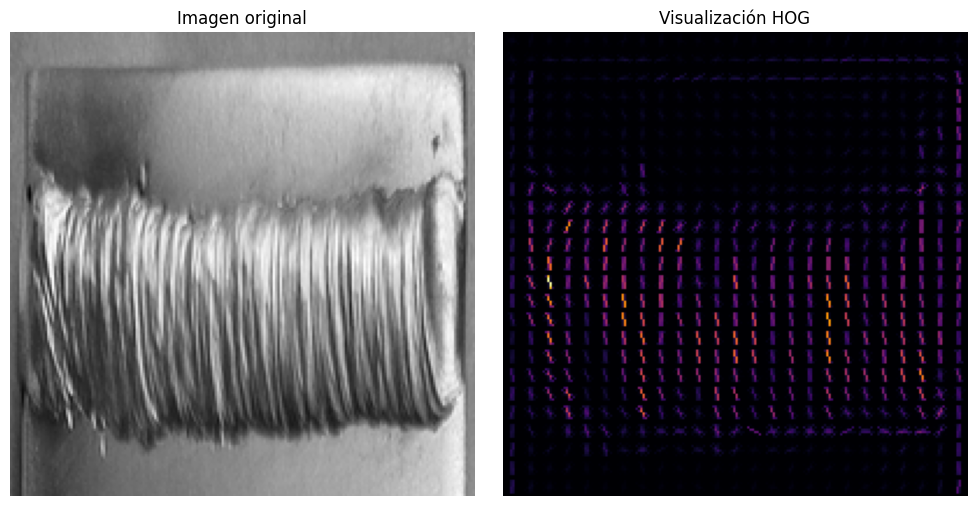

Longitud del vector HOG: 20736


In [ ]:
good_example = os.path.join(PROCESSED_GOOD_PATH, os.listdir(PROCESSED_GOOD_PATH)[0])
visualize_hog_example(good_example)

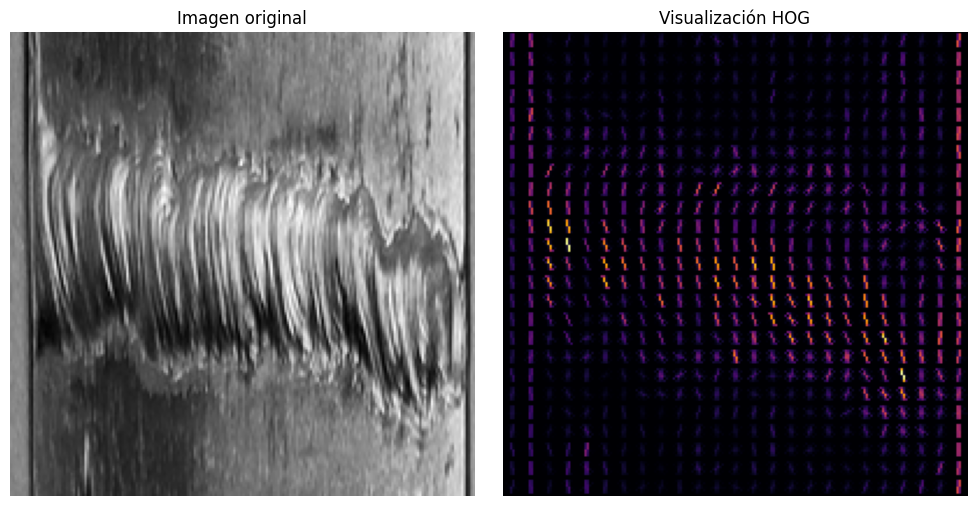

Longitud del vector HOG: 20736


In [ ]:
bad_example = os.path.join(PROCESSED_BAD_PATH, os.listdir(PROCESSED_BAD_PATH)[0])
visualize_hog_example(bad_example)

## **1. Limpieza de los Datos**
---

La elección de las técnicas de preprocesamiento puede diferir en cada conjunto de datos. Recuerde que es posible aplicar, según sea necesario (no necesariamente todas), las técnicas generales que se han explorado en el curso. La elección dependerá del tipo de datos con el que esté trabajando.

A lo largo de esta entrega, busque responder las siguientes preguntas:

- ¿Cuáles fueron los criterios utilizados para identificar y tratar valores atípicos, datos faltantes o cualquier otra anomalía en el conjunto de datos durante el proceso de limpieza?
- ¿Cómo se justificaría la necesidad de cada paso de preprocesamiento en términos de mejora de la calidad de los datos y preparación para el análisis subsiguiente?

A continuación encontrará los puntos a tratar a medida que va realizando la preparación de los datos. En cada punto defina el estado en que se encontraba el dataset, ademas de explicar y justificar las acciones y decisiones que se tomaron.

### **1.1. Valores faltantes**
---



Tomando el desarrollo del HOG anterior, para llevar a cabo una verificación de los valores faltantes podemos hacer lo siguiente

In [ ]:
# Verificar valores faltantes después de crear el dataset
df_hog = build_hog_dataset()
missing_values = df_hog.isnull().sum()
total_missing = missing_values.sum()
total_cells = np.prod(df_hog.shape)

print(f"Porcentaje de valores faltantes: {(total_missing/total_cells)*100:.2f}%")
print("Valores faltantes por columna:")
print(missing_values[missing_values > 0])

Total imágenes procesadas: 180
Dimensiones del dataset HOG: (180, 20738)
Porcentaje de valores faltantes: 0.00%
Valores faltantes por columna:
Series([], dtype: int64)


En este caso, puede observarse que el datset asi trabajado no presenta valores faltantes. Por otra parte, se puede realizar el siguiente codigo para identificar cuáles son las filas con valores faltantes.

In [ ]:
def identify_missing_values(df):
    """Identifica y reporta valores faltantes en el dataset"""

    # Método 1: Verificación directa
    missing_count = df.isnull().sum()
    missing_columns = missing_count[missing_count > 0]

    # Método 2: Porcentaje por columna
    missing_percentage = (df.isnull().sum() / len(df)) * 100

    # Método 3: Verificar filas completas
    complete_rows = df.dropna().shape[0]

    print(f"Filas totales: {len(df)}")
    print(f"Filas completas: {complete_rows}")
    print(f"Filas con al menos un valor faltante: {len(df) - complete_rows}")
    print("\nColumnas con valores faltantes:")
    for col in missing_columns.index:
        print(f"  - {col}: {missing_count[col]} valores ({missing_percentage[col]:.2f}%)")

    return missing_columns

# Ejecutar identificación
missing_columns = identify_missing_values(df_hog)

Filas totales: 180
Filas completas: 180
Filas con al menos un valor faltante: 0

Columnas con valores faltantes:


Como era de suponerse, asi como no se presentaron valores faltantes, tampoco se presentaron filas sin valores. Ahora bien, podemos mostrar el siguiente codigo para mostrar cómo podría ser una estrategia para llenar los valores faltantes, en este caso se usaría una eliminación de los valores si nos encontramos con más del 30% de valores faltantes. Mientras que, por otra parte, si es un porcentage pequeño menor al 5%, en este caso se imputaria la media si se trata de un valor númerico, o la moda si es categorico. Finalmente, si es un caso ni muy grande ni muy pequeño, se analiza si sigue un patrón aleatorio o no, rellendando los valores aleatoriamente o según ese patrón. Enseeguida se mostrará entonces un codigo que propone estas medidas pero que no especifica cómo se harían dado que nuestro codigo no presenta ninguno de estos casos.

In [ ]:
def evaluate_missing_strategy(df, missing_columns):
    """Evalúa la estrategia más apropiada para manejar missing values"""

    strategies = {}

    for col in missing_columns:
        missing_percentage = (df[col].isnull().sum() / len(df)) * 100

        # Criterios de decisión
        if missing_percentage > 30:
            strategies[col] = "ELIMINAR_COLUMNA - Más del 30% faltante"
        elif missing_percentage < 5:
            # Para HOG features, considerar imputación
            if col.startswith('hog_'):
                strategies[col] = "IMPUTAR_MEDIA - Feature HOG con poco faltante"
            else:
                strategies[col] = "IMPUTAR_MODA - Variable categórica"
        else:
            # Análisis de patrón
            if is_missing_random(df, col):
                strategies[col] = "IMPUTAR - Patrón aleatorio"
            else:
                strategies[col] = "ANALIZAR_CAUSAS - Patrón sistemático"

    return strategies

def is_missing_random(df, column):
    """Verifica si los missing values son aleatorios"""
    # Comparar distribución entre grupos con y sin missing values
    # en variables clave como 'label'
    return True  # Implementar lógica específica

Es importante tener en cuenta que, dado que estamos basando el análisis de nuestro proyecto en un HOG, el cual analiza la textura de las cosas, si nos encontramos con valores faltantes, podrían distorsionarse los patrones de la textura, llevandonos a problemas en el preprocesamiento de las imagenes. Sin embargo, al analizar el dataset con `isnull()`, nos damos cuenta de que no hay valores faltantes en el conjunto de datos luego del HOG, ni analizando todo el dataset en su conjunto, ni haciendolo por columnas, por lo que no hay variables que sean críticas en este caso de falta de información.

### **1.2. Valores duplicados**
----
Ante la presencia de valores duplicados, es esencial reflexionar sobre su impacto en los resultados.

* ¿Cómo se identificaron y manejaron los valores duplicados en el conjunto de datos?
* ¿Hubo alguna consideración especial al tratar duplicados en función de ciertas variables?
* ¿Pueden estos duplicados sesgar el análisis, y en qué medida?
* ¿Se justifica la eliminación de duplicados para mantener la coherencia y singularidad de los datos?
* ¿Cómo se aseguró de que la eliminación de duplicados no afectara negativamente la representación del conjunto de datos?

La identificación y eliminación de duplicados busca asegurar que cada registro aporte información única y valiosa.

Para realizar la verificacion de valores duplicados también partiremos de nuestro data frame con los vectores de características HOG, asumiendo que las imágenes duplicadas tendrán el mismo vector.
Para ello, el siguiente codigo crea una copia del hog_df, evitando mutar directamente el df original. A partir de este, filtramos las columnas que contienen las características HOG y paracada fila generamos una tupla con el vector completo de características redondeado a seis decimales, a esta tupla se le asigna un hash que actúa como un identificador representativo del vector HOG. De este modo, imágenes con vectores idénticos producen el mismo valor de hash, lo que permite detectar duplicados

In [ ]:
hog_df_copy = hog_df.copy()

hog_columns = [col for col in hog_df_copy.columns if col.startswith("hog_")]
hog_df_copy["hog_hash"] = hog_df_copy[hog_columns].apply(lambda x: hash(tuple(np.round(x,6))), axis =1)
exact_duplicates = hog_df_copy[hog_df_copy.duplicated("hog_hash", keep=False)].sort_values("hog_hash")
print(f"Duplicados exactos detectados: {exact_duplicates.shape[0]}")

Duplicados exactos detectados: 0


Por otra parte, en el tipo de análisis que queremos realizar para el caso del resultado del HOG, antes de buscar y eliminar valores duplicados, hay que entender estos valores como valores unicos propios de una imagen y en ese caso se justifica otro tratamiento de estos datos. Puntualmente, no tanto para valores duplicados, sino para valores similares, lo que proponemos es realizar una reducción de la dimensionalidad por medio de un análisis de componentes principales (PCA), para asi ahorrarnos el coste computacional de tomar todos los datos que produce el HOG.

Por lo tanto, para eso, proponemos realizar el siguiente codigo.

Dimensiones originales: (180, 20736)
Número de features HOG: 20736
Varianza explicada por los primeros componentes:
  Componente 1: 0.0894 (0.0894 acumulada)
  Componente 2: 0.0376 (0.1270 acumulada)
  Componente 3: 0.0318 (0.1588 acumulada)
  Componente 4: 0.0225 (0.1814 acumulada)
  Componente 5: 0.0191 (0.2005 acumulada)
  Componente 6: 0.0152 (0.2157 acumulada)
  Componente 7: 0.0131 (0.2288 acumulada)
  Componente 8: 0.0127 (0.2415 acumulada)
  Componente 9: 0.0112 (0.2527 acumulada)
  Componente 10: 0.0109 (0.2636 acumulada)

Componentes para 95.0% varianza: 160
 COMPONENTES ÓPTIMOS (MÉTODO DEL CODO): 9
Reducción dimensional: 20736 → 9
Reducción del 100.0%


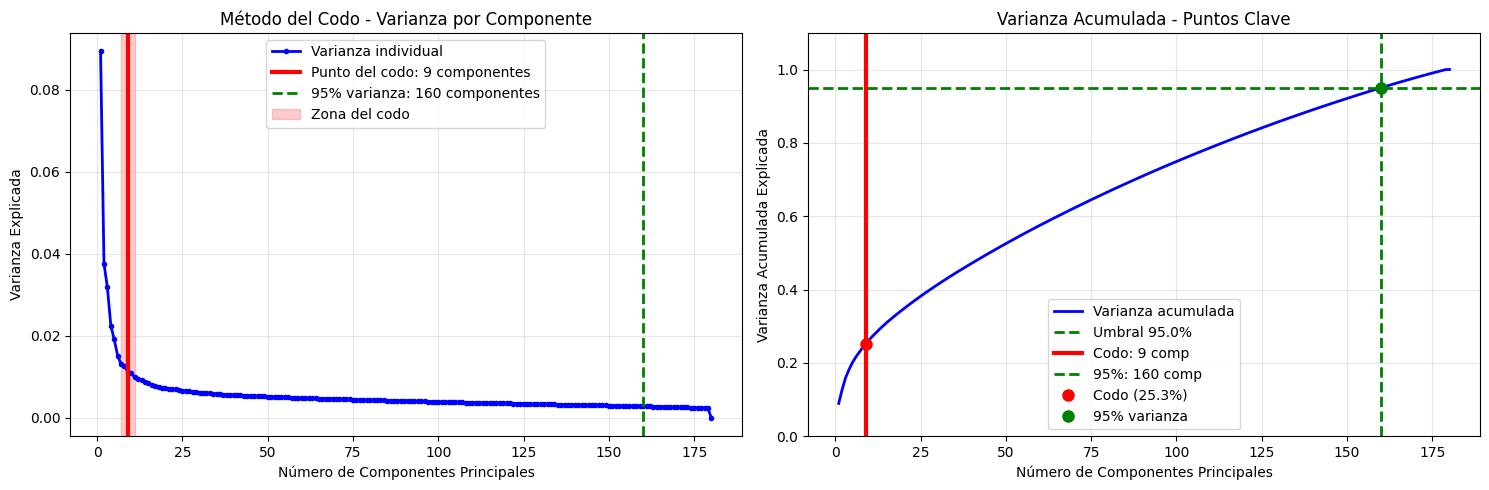

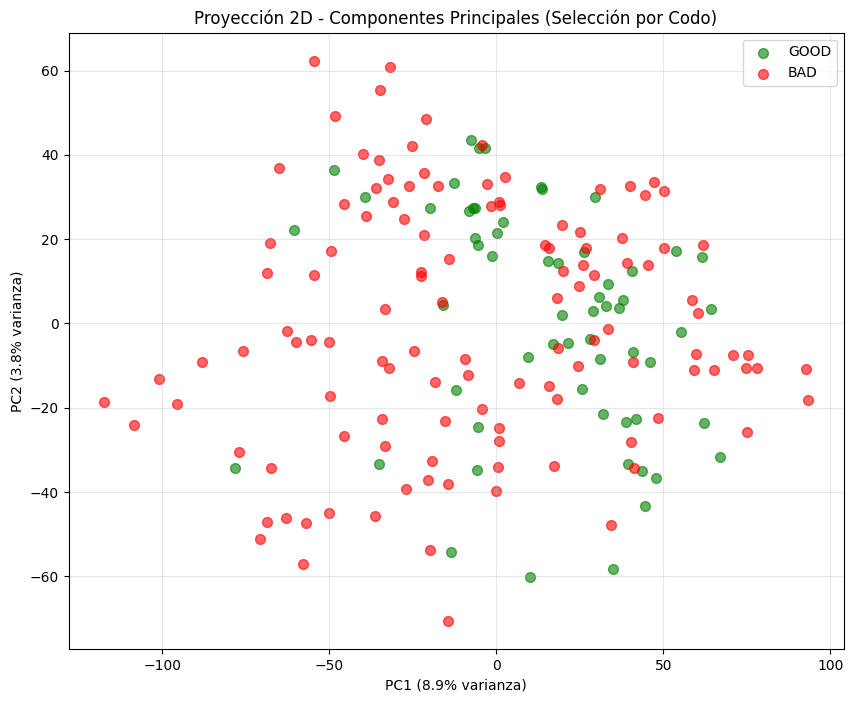

   COMPONENTES SELECCIONADOS: 9
   • Varianza explicada: 25.3%
   • Eficiencia: 9 componentes vs 160 para 95%

 El punto del codo representa donde los componentes adicionales
   aportan significativamente menos información nueva
   Componentes después del codo típicamente capturan ruido
   Esta selección optimiza el trade-off entre información y eficiencia
Dimensiones del dataset reducido: (180, 11)
Componentes PCA: 9
✓ Dataset optimizado usando método del codo para data science!


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

def pca_hog_dimensionality_reduction(df, target_column='label', variance_threshold=0.95, plot_results=True):

    # 1. Separar features HOG y target
    hog_columns = [col for col in df.columns if col.startswith('hog_')]
    X = df[hog_columns]
    y = df[target_column] if target_column in df.columns else None


    print(f"Dimensiones originales: {X.shape}")
    print(f"Número de features HOG: {len(hog_columns)}")

    # 2. Estandarizar los datos
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # 3. Aplicar PCA completo para análisis
    pca_full = PCA()
    X_pca_full = pca_full.fit_transform(X_scaled)

    # 4. Análisis de varianza explicada
    explained_variance = pca_full.explained_variance_ratio_
    cumulative_variance = np.cumsum(explained_variance)

    # 5. Encontrar número óptimo de componentes usando método del codo
    n_components_95 = np.argmax(cumulative_variance >= variance_threshold) + 1
    if n_components_95 > len(explained_variance):
        n_components_95 = len(explained_variance)

    # Método del codo para data science
    elbow_components = find_elbow_point(explained_variance)

    print(f"Varianza explicada por los primeros componentes:")
    for i in range(min(10, len(explained_variance))):
        print(f"  Componente {i+1}: {explained_variance[i]:.4f} ({cumulative_variance[i]:.4f} acumulada)")

    print(f"\nComponentes para {variance_threshold*100}% varianza: {n_components_95}")
    print(f" COMPONENTES ÓPTIMOS (MÉTODO DEL CODO): {elbow_components}")
    print(f"Reducción dimensional: {len(hog_columns)} → {elbow_components}")
    print(f"Reducción del {((len(hog_columns) - elbow_components) / len(hog_columns)) * 100:.1f}%")

    # 6. Aplicar PCA con número óptimo de componentes (método del codo)
    pca_optimal = PCA(n_components=elbow_components)
    X_pca_optimal = pca_optimal.fit_transform(X_scaled)

    # 7. Crear DataFrame con componentes PCA
    pca_columns = [f'pca_{i+1}' for i in range(elbow_components)]
    df_pca = pd.DataFrame(X_pca_optimal, columns=pca_columns, index=df.index)

    # 8. Preservar información original importante
    if target_column in df.columns:
        df_pca[target_column] = y
    if 'filename' in df.columns:
        df_pca['filename'] = df['filename']

    # 9. Visualizaciones con método del codo
    if plot_results:
        plot_pca_analysis_with_elbow(explained_variance, cumulative_variance,
                                   n_components_95, elbow_components, variance_threshold)

        # Plot 2D if there are at least 2 components
        if elbow_components >= 2 and target_column in df.columns:
            plot_pca_2d(df_pca, target_column, pca_optimal)

    # 10. Información del análisis
    analysis_info = {
        'original_dimensions': X.shape[1],
        'components_95_variance': n_components_95,
        'elbow_components': elbow_components,
        'variance_threshold': variance_threshold,
        'explained_variance_ratio': pca_optimal.explained_variance_ratio_,
        'cumulative_variance': cumulative_variance,
        'total_variance_explained': cumulative_variance[elbow_components-1],
        'scaler': scaler,
        'pca_optimal': pca_optimal,
        'hog_columns': hog_columns
    }

    return df_pca, pca_optimal, analysis_info

def find_elbow_point(explained_variance):

    if len(explained_variance) < 5:
        return len(explained_variance)

    # Calcular la segunda derivada de la varianza explicada
    # El punto del codo es donde la segunda derivada es máxima (máxima curvatura)
    first_derivative = np.gradient(explained_variance)
    second_derivative = np.gradient(first_derivative)

    # Suavizar la segunda derivada para evitar ruido
    window_size = min(5, len(second_derivative) // 3)
    if window_size % 2 == 0:
        window_size += 1

    smoothed_second_deriv = np.convolve(second_derivative, np.ones(window_size)/window_size, mode='valid')

    # Encontrar el punto donde la segunda derivada es máxima (punto de inflexión)
    # Buscamos en los primeros 2/3 de los componentes para evitar el final de la curva
    search_limit = len(smoothed_second_deriv) * 2 // 3
    elbow_idx = np.argmax(smoothed_second_deriv[:search_limit])

    # Ajustar el índice debido a la convolución
    elbow_point = elbow_idx + window_size // 2 + 1

    # Asegurar un mínimo razonable de componentes
    min_components = max(3, len(explained_variance) // 20)
    elbow_point = max(elbow_point, min_components)

    # Asegurar un máximo razonable
    max_components = min(50, len(explained_variance) // 2)
    elbow_point = min(elbow_point, max_components)

    return elbow_point

def plot_pca_analysis_with_elbow(explained_variance, cumulative_variance, n_components_95, elbow_components, threshold):


    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

    # Gráfico 1: Varianza explicada por componente con punto del codo
    components_range = range(1, len(explained_variance) + 1)

    # Línea principal
    ax1.plot(components_range, explained_variance, 'o-', linewidth=2, color='blue', markersize=3, label='Varianza individual')

    # Marcar el punto del codo
    ax1.axvline(x=elbow_components, color='red', linestyle='-', linewidth=3,
                label=f'Punto del codo: {elbow_components} componentes')

    # Marcar el 95% de varianza
    ax1.axvline(x=n_components_95, color='green', linestyle='--', linewidth=2,
                label=f'95% varianza: {n_components_95} componentes')

    # Destacar el área del codo
    ax1.axvspan(elbow_components-2, elbow_components+2, alpha=0.2, color='red', label='Zona del codo')

    ax1.set_xlabel('Número de Componentes Principales')
    ax1.set_ylabel('Varianza Explicada')
    ax1.set_title('Método del Codo - Varianza por Componente')
    ax1.legend()
    ax1.grid(True, alpha=0.3)

    # Gráfico 2: Varianza acumulada con puntos clave
    ax2.plot(components_range, cumulative_variance, 'b-', linewidth=2, label='Varianza acumulada')

    # Líneas de referencia
    ax2.axhline(y=threshold, color='green', linestyle='--', linewidth=2, label=f'Umbral {threshold*100}%')
    ax2.axvline(x=elbow_components, color='red', linestyle='-', linewidth=3,
                label=f'Codo: {elbow_components} comp')
    ax2.axvline(x=n_components_95, color='green', linestyle='--', linewidth=2,
                label=f'95%: {n_components_95} comp')

    # Puntos importantes
    variance_at_elbow = cumulative_variance[elbow_components-1]
    ax2.plot(elbow_components, variance_at_elbow, 'ro', markersize=8, label=f'Codo ({variance_at_elbow:.1%})')
    ax2.plot(n_components_95, threshold, 'go', markersize=8, label=f'95% varianza')

    ax2.set_xlabel('Número de Componentes Principales')
    ax2.set_ylabel('Varianza Acumulada Explicada')
    ax2.set_title('Varianza Acumulada - Puntos Clave')
    ax2.legend()
    ax2.grid(True, alpha=0.3)
    ax2.set_ylim(0, 1.1)

    plt.tight_layout()
    plt.show()

def plot_pca_2d(df_pca, target_column, pca_model):

    plt.figure(figsize=(10, 8))

    # Colores para diferentes clases
    colors = {'GOOD': 'green', 'BAD': 'red'} if target_column == 'label' else None

    if colors:
        for label, color in colors.items():
            mask = df_pca[target_column] == label
            plt.scatter(df_pca.loc[mask, 'pca_1'],
                       df_pca.loc[mask, 'pca_2'],
                       c=color, label=label, alpha=0.6, s=50)
    else:
        plt.scatter(df_pca['pca_1'], df_pca['pca_2'],
                   c=pd.factorize(df_pca[target_column])[0],
                   alpha=0.6, s=50, cmap='viridis')

    plt.xlabel(f'PC1 ({pca_model.explained_variance_ratio_[0]*100:.1f}% varianza)')
    plt.ylabel(f'PC2 ({pca_model.explained_variance_ratio_[1]*100:.1f}% varianza)')
    plt.title('Proyección 2D - Componentes Principales (Selección por Codo)')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()

def explain_elbow_method(analysis_info):
    """Explica el método del codo y por qué es mejor"""

    print(f"   COMPONENTES SELECCIONADOS: {analysis_info['elbow_components']}")
    print(f"   • Varianza explicada: {analysis_info['total_variance_explained']:.1%}")
    print(f"   • Eficiencia: {analysis_info['elbow_components']} componentes vs {analysis_info['components_95_variance']} para 95%")


def complete_pca_analysis_pipeline(df_hog):
    """Pipeline completo de análisis PCA usando método del codo"""

    # 1. Análisis PCA principal
    df_pca, pca_model, analysis_info = pca_hog_dimensionality_reduction(
        df_hog,
        variance_threshold=0.95,
        plot_results=True
    )

    # 2. Explicación del método
    explain_elbow_method(analysis_info)

    # 3. Información adicional
    print(f"\n El punto del codo representa donde los componentes adicionales")
    print(f"   aportan significativamente menos información nueva")
    print(f"   Componentes después del codo típicamente capturan ruido")
    print(f"   Esta selección optimiza el trade-off entre información y eficiencia")

    return df_pca, pca_model, analysis_info

# USO PRÁCTICO
if __name__ == "__main__":
    # Ejecutar el análisis PCA completo
    df_pca_result, pca_model_result, analysis_info_result = complete_pca_analysis_pipeline(hog_df)

    print(f"Dimensiones del dataset reducido: {df_pca_result.shape}")
    print(f"Componentes PCA: {analysis_info_result['elbow_components']}")
    print(f"✓ Dataset optimizado usando método del codo para data science!")

Con base en este codigo podemos observar que luego de usar el método del codo con base en la varianza nos damos cuenta de que un punto optimo en cuanto al coste computacional sería el de tomar 9 componentes principales, mientras que se sugieren 160 componentes para captar el 95% de la varianza.

### **1.3. Valores atípicos**
---
Al abordar valores atípicos, es relevante cuestionarse sobre la naturaleza de estos puntos extremos.
* ¿Son errores de medición o representan información válida pero excepcional?
* ¿Qué criterios o técnicas se utilizaron para identificar los valores atípicos?
* ¿Se aplicaron métodos estadísticos o visuales para detectar los valores atípicos?
* ¿Cuál fue la decisión final sobre cómo tratar los valores atípicos y por qué?

La elección entre eliminar o transformar estos valores debe basarse en su influencia en la distribución y la interpretación de los resultados, asegurando que el análisis refleje de manera precisa la realidad del conjunto de datos.

Para detectar los valores atípicos en el conjunto de imagenes, partimos nuevamente del `hog_df`. Teniendo en cuenta que los vectores de características HOG representan datos multivariados, descartamos el uso del rango intercuartílico para identificar outliers ya que es más apropiado para variables de una dimensión,  y utilizamos en cambio un `IsolationForest`. Este es un algoritmo no supervisado cuyo objetivo es detectar observaciones anormales dentro de la distribución general de las imágenes.


In [ ]:
from sklearn.ensemble import IsolationForest

def detect_hog_outliers_isolationforest(hog_df, good_path, bad_path, contamination=0.02, random_state=42):
    """
    Detecta outliers en un DataFrame de características HOG usando Isolation Forest,
    imprime los nombres y etiquetas de los outliers y visualiza sus imágenes.
    """
    hog_columns = [col for col in hog_df.columns if col.startswith("hog_")]
    hog_features = hog_df[hog_columns].values

    # Entrenar Isolation Forest
    iso = IsolationForest(contamination=contamination, random_state=random_state)
    preds = iso.fit_predict(hog_features)
    scores = iso.decision_function(hog_features)

    hog_df["outlier_flag"] = preds  # -1 = outlier, 1 = normal
    hog_df["outlier_score"] = scores

    n_outliers = (hog_df["outlier_flag"] == -1).sum()
    print(f"\nOutliers detectados: {n_outliers} de {len(hog_df)} ({n_outliers/len(hog_df)*100:.2f}%)")

    outliers = hog_df[hog_df["outlier_flag"] == -1]

    if outliers.empty:
        print("\nNo se detectaron outliers.")
        return hog_df

    print("\nArchivos detectados como outliers:")
    for _, row in outliers.iterrows():
        print(f" - {row['filename']}  (label: {row['label']})")

    # Visualizar las imágenes con PIL
    print("\nImágenes de outliers...")
    fig, axes = plt.subplots(1, len(outliers), figsize=(5 * len(outliers), 5))

    if len(outliers) == 1:
        axes = [axes]  #

    for ax, (_, row) in zip(axes, outliers.iterrows()):
        img_path = os.path.join(
            good_path if row["label"] == "GOOD" else bad_path,
            row["filename"]
        )

        try:
            img = Image.open(img_path).convert("RGB")
            ax.imshow(img)
            ax.set_title(f"{row['filename']}\n{row['label']}")
        except FileNotFoundError:
            ax.text(0.5, 0.5, "Imagen no encontrada", ha="center", va="center")
            ax.set_title(row["filename"])

        ax.axis("off")

    plt.tight_layout()
    plt.show()



Outliers detectados: 4 de 180 (2.22%)

Archivos detectados como outliers:
 - 1A11.png  (label: GOOD)
 - 13A4.png  (label: BAD)
 - 13A5.png  (label: BAD)
 - 11A7.png  (label: BAD)

Imágenes de outliers...


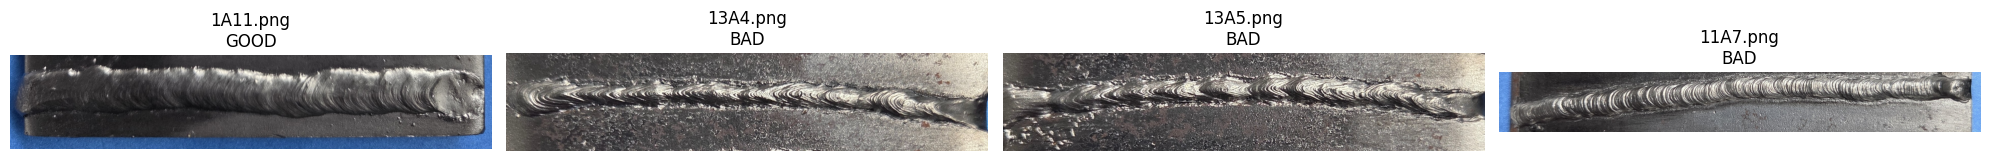

In [ ]:
detect_hog_outliers_isolationforest(hog_df, PROCESSED_GOOD_PATH, PROCESSED_BAD_PATH)

A partir de lo anterior identificamos y visualizamos 4 outliers, en el caso de los archivos `1A11` - GOOD y `11A7` - BAD vemos que se trata de imagenes que tienen espacio no recortado en los margenes, adicionalmente `11A7` es una imagen cuyas dimensiones no corresponden a las del resto del conjunto. En el caso de `13A4` y `13A5` identificamos que son imagenes que tienen un desenfoque. Estos outliers se asocian a diferencias en la calidad o la captura de las imágenes. En consecuencia, se procederá a eliminar estos registros del conjunto de datos.

In [ ]:
filenames_to_drop = ['1A11.png', '11A7.png', '13A4.png', '13A5.png']
processed_hog_df = hog_df.drop(hog_df[hog_df['filename'].isin(filenames_to_drop)].index, inplace=True)

### **1.4. Datos Inconsistentes**
---
Frente a inconsistencias en los datos, es importante analizar cómo estas discrepancias podrían afectar la comparabilidad y comprensión de la información.

* ¿Cómo se identificaron las inconsistencias en los datos?
* ¿Las inconsistencias son lo suficientemente significativas como para justificar una estandarización?
* ¿Cómo se pueden homogeneizar unidades y formatos para garantizar coherencia en el análisis?
* ¿Qué estrategias se implementaron para abordar las inconsistencias y asegurar la coherencia?
* ¿Se establecieron reglas de validación específicas para garantizar la consistencia?

Teniendo en cuenta que en fases anteriores hemos estadarizado formatos de las imagenes y sus dimensiones, en este caso analizaremos inconsistencias directamente en los datos que tenemos en `hog_df`

In [ ]:
hog_df.dtypes

,0
filename,object
label,object
hog_0,float64
hog_1,float64
hog_2,float64
...,...
hog_20733,float64
hog_20734,float64
hog_20735,float64
outlier_flag,int64


In [ ]:
non_float_cols = hog_df[[col for col in hog_df.columns if col.startswith("hog_")]].select_dtypes(exclude=["float64"]).columns

if len(non_float_cols) > 0:
    print("Columnas 'hog_' que no son float64:")
    for col in non_float_cols:
        print(f" - {col}: {hog_df[col].dtype}")
else:
    print("Todas las columnas 'hog_' son de tipo float64.")

Todas las columnas 'hog_' son de tipo float64.


Con el codigo anterior verificamos los tipos de los datos, el unico procesamiento que realizaremos será castear los tipos `object` de las columnas `filename` y `label` a su tipo más especifico `string`.

In [ ]:
hog_df["filename"] = hog_df["filename"].astype("string")
hog_df["label"] = hog_df["label"].astype("string")

In [ ]:
hog_df.dtypes

,0
filename,string[python]
label,string[python]
hog_0,float64
hog_1,float64
hog_2,float64
...,...
hog_20733,float64
hog_20734,float64
hog_20735,float64
outlier_flag,int64


### **1.5. Datos corruptos**
---
En la detección de datos corruptos, pregunte si hay posibles errores de entrada o problemas de transferencia que podrían haber afectado la integridad de los datos.
* ¿Cómo se determinó la presencia de datos corruptos en el conjunto de datos?
* ¿Qué medidas se tomaron para corregir o eliminar los datos corruptos?
* ¿Hubo casos en los que la corrupción de datos no pudo ser manejada y cómo se justificó esa decisión?

En este notebook, la presencia de datos corruptos (o, más bien, inconsistentes) se determinó al momento de mirar el formato de las imagenes definidas, para este caso, se encontraron archivos .jgp y .png.

Esta celda definió una función (summarize_image_formats) que, en lugar de confiar en la extensión del archivo (ej. .jpg), abría cada imagen y leía su formato real. La salida de esta celda fue:

---



---



In [ ]:
from collections import Counter

def summarize_image_formats(folder):
    formats = []
    for f in os.listdir(folder):
        if f.lower().endswith(('.jpg', '.jpeg', '.png', '.bmp', '.tiff', '.webp')):
            try:
                with Image.open(os.path.join(folder, f)) as img:
                    formats.append(img.format)
            except:
                pass
    return Counter(formats)

print("Formatos en good:", summarize_image_formats(RAW_GOOD_PATH))
print("Formatos en bad:", summarize_image_formats(RAW_BAD_PATH))

Formatos en good: Counter({'PNG': 60})
Formatos en bad: Counter({'PNG': 120})


Se tomó una medida de estandarización para corregir esta inconsistencia.

* Abrir cada imagen sin importar su formato original: MPO, JPEG, o PNG.

* Convertirla a un modo estándar "RGB", lo que elimina problemas de canales alfa o formatos complejos.

* Guardar todas las imágenes en un nuevo formato unificado PNG dentro de las carpetas processed_data.

In [ ]:
def convert_images(input_dir, output_dir, format='PNG', overwrite=True):
    """
    Convierte todas las imágenes de un directorio a un formato específico.
    """
    os.makedirs(output_dir, exist_ok=True)
    converted = []

    for filename in os.listdir(input_dir):
        filepath = os.path.join(input_dir, filename)
        if not os.path.isfile(filepath):
            continue
        try:
            with Image.open(filepath) as img:
                img = img.convert("RGB")
                base_name, _ = os.path.splitext(filename)
                output_path = os.path.join(output_dir, f"{base_name}.{format.lower()}")
                if not overwrite and os.path.exists(output_path):
                    continue
                img.save(output_path, format=format, quality=95 if format=='JPEG' else None)
                converted.append(output_path)
        except Exception as e:
            print(f"Error con {filename}: {e}")
    print(f"{len(converted)} imágenes convertidas a {format}")
    return converted

En el flujo de trabajo de este notebook, todos los problemas de datos identificados fueron manejados.

### **1.6. Selección de datos**
---
En la selección de datos, reflexione sobre las variables que son realmente relevantes para sus objetivos de análisis.
* ¿Qué criterios se utilizaron para seleccionar los datos relevantes para el análisis?
* ¿Se aplicaron técnicas de muestreo o filtrado para reducir el tamaño del conjunto de datos?
* ¿Cómo se justificó la inclusión o exclusión de ciertas variables en la selección de datos?

Se utilizaron dos criterios principales para la selección:

Dado que las imágenes crudas no son consistentes, el notebook las procesa para crear un dataset final y relevante para el machine learning. Este dataset final consiste en:

* Formato Estandarizado: Todas las 180 imágenes fueron convertidas a formato PNG.

* Características Extraídas (HOG): En lugar de usar los píxeles crudos, el notebook utiliza el Histograma de Gradientes Orientados (HOG) para describir la forma y textura de cada imagen. Esto se hace después de redimensionar todas las imágenes a 200x200 píxeles.

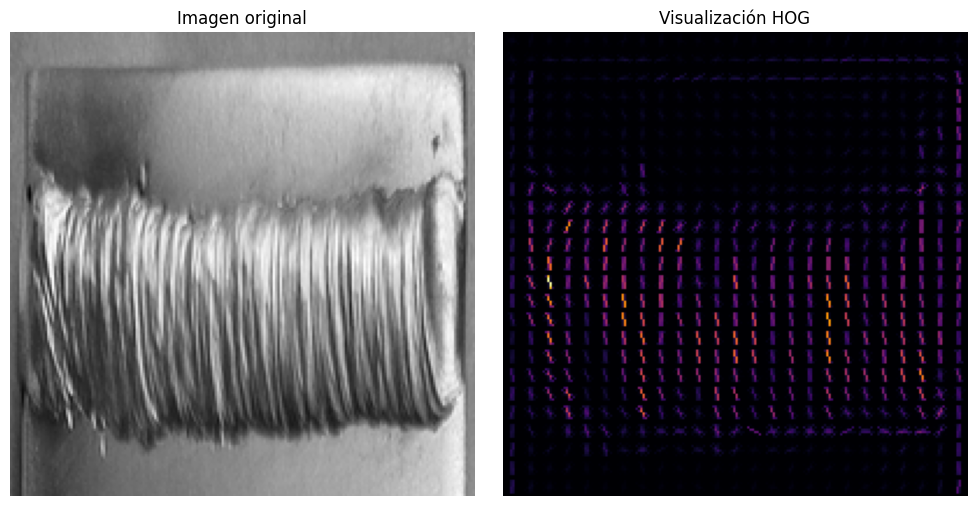

Longitud del vector HOG: 20736


In [ ]:
good_example = os.path.join(PROCESSED_GOOD_PATH, os.listdir(PROCESSED_GOOD_PATH)[0])
visualize_hog_example(good_example)

El filtrado se usó para asegurar la calidad de los datos, garantizando que solo se procesaran archivos de imagen reales y se ignorara cualquier otro archivo (como archivos ocultos del sistema).

Esto se hizo en dos pasos:

Definición del Filtro
: Primero, se definió la "regla" del filtro con esta función, que comprueba si el nombre de un archivo termina en una extensión de imagen válida.

In [ ]:
def is_valid_img(filename):
  return filename.lower().endswith(('.jpg', '.jpeg', '.png', '.mpo', '.bmp'))

Aplicación del Filtro: Luego, al momento de leer las imágenes "good" y "bad", esta función se usó dentro de un if para decidir si procesar el archivo o ignorarlo.

In [ ]:
# (Este es un extracto del código en esas celdas)
for filename in os.listdir(RAW_GOOD_PATH):
  if is_valid_img(filename):  # <-- AQUÍ SE APLICA EL FILTRO

      record = img_to_record(RAW_GOOD_PATH, filename, 1)
      good_records.append(record)

El muestreo es una técnica para reducir el tamaño del dataset (por ejemplo, tomar solo 50 de las 120 imágenes "bad" para balancear las clases).

Sabemos que no se aplicó ningún muestreo porque el número de imágenes al inicio del proceso es el mismo que al final.

Conteo Final: Después de todo el preprocesamiento (conversión a PNG) y la extracción de características (HOG), la celda que construye el dataset final imprimió:

In [ ]:
dataset completo
Total de imágenes procesadas: 583
Imágenes GOOD (1): 233
Imágenes BAD (0): 350

## **Créditos**
---

* **Profesor:** [Fabio Augusto Gonzalez](https://dis.unal.edu.co/~fgonza/)
* **Asistente docente :**
  * [Rosa Alejandra Superlano Esquibel](https://www.linkedin.com/in/alejandrasuperlano/).
* **Diseño de imágenes:**
    - [Rosa Alejandra Superlano Esquibel](https://www.linkedin.com/in/alejandrasuperlano/).
* **Coordinador de virtualización:**
    - [Edder Hernández Forero](https://www.linkedin.com/in/edder-hernandez-forero-28aa8b207/).

**Universidad Nacional de Colombia** - *Facultad de Ingeniería*